# **DATA PREPROCESSING:**

**1.Import Libraries:**

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

**2.Import Dataset:**

In [27]:
# upload the dataset
df = pd.read_csv('weatherAUS.csv')

**3.Describing dataset:**

In [28]:
# Display the first few rows to understand your data
print(df.head())
# Summary statistics for numerical features
print(df.describe())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

**4.Separating numerical and categorical features:**

In [29]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Separate categorical and numerical columns
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(exclude=['object']).columns

# Display the list of categorical features
print("\nCategorical Features:")
print(categorical_features)

# Display the list of numerical features
print("\nNumerical Features:")
print(numerical_features)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       

**5.Calculating percentage of missing values:**

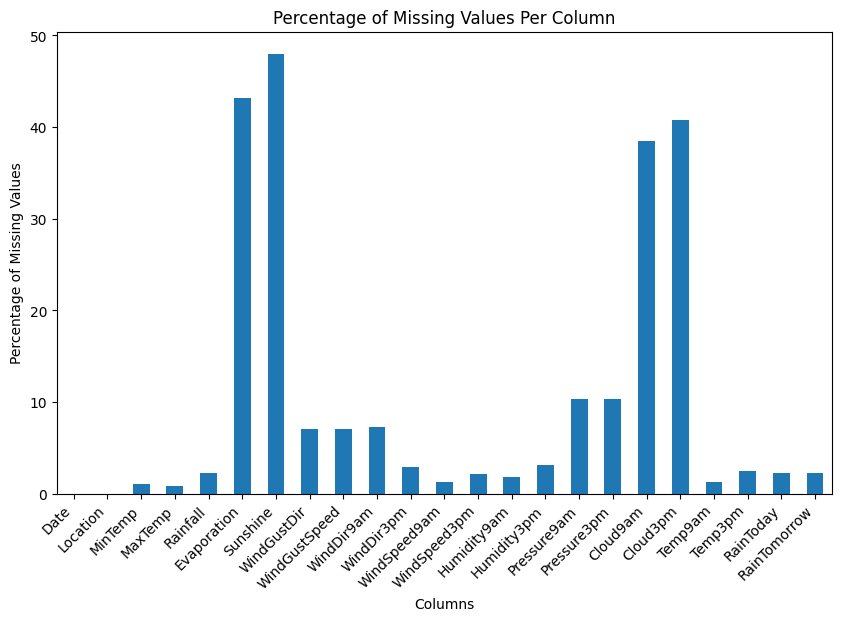

In [30]:
# Calculate the percentage of missing values for each column
missing_values = df.isnull().sum()
total_values = df.shape[0]
missing_percentage = (missing_values / total_values) * 100

# Plotting
missing_percentage.plot(kind='bar', figsize=(10, 6))
plt.title('Percentage of Missing Values Per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha="right")
plt.show()

In [31]:
# Display missing value percentages
print("\n\nPercentage of missing values in each column:")
print(missing_percentage)



Percentage of missing values in each column:
Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64


**6.Handling Missing values:**

In [32]:
# Remove columns with very high missing values
df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

# Impute missing values in numeric columns with mean
numeric_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                   'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm']
for col in numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Impute missing values in categorical columns with mode
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if any missing values remain
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values in each column after handling:")
print(missing_values_percentage)


Percentage of missing values in each column after handling:
Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64


**7.Min-Max scaling for numerical columns:**

In [33]:
# Initialize Min-Max scaler
min_max_scaler = MinMaxScaler()

# Define the numerical columns
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                  'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

# Apply Min-Max scaling to the numerical columns
df[numerical_cols] = min_max_scaler.fit_transform(df[numerical_cols])

# Convert 'Date' to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract the numerical representation of the date, such as the number of days since a reference date
df['Date_numeric'] = (df['Date'] - df['Date'].min()).dt.days

# Apply Min-Max scaling to the numerical representation of the date
df['Date_scaled'] = min_max_scaler.fit_transform(df[['Date_numeric']])

# Drop the original date column and the temporary numerical representation column if needed
df.drop(['Date', 'Date_numeric'], axis=1, inplace=True)

**8.Label encoding for 'RainToday' and 'RainTomorrow':**

In [34]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'RainToday' and 'RainTomorrow'
df['RainToday'] = label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'])

**9.One-Hot Encoding for 'Location','WindGusDir','WindDir9am','WindDir3pm':**

In [35]:
# List of categorical features other than RainToday and RainTomorrow
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols)

# Display the resulting DataFrame
print(df)


         MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       0.516509  0.523629  0.001617       0.294574      0.153846   
1       0.375000  0.565217  0.000000       0.294574      0.030769   
2       0.504717  0.576560  0.000000       0.310078      0.146154   
3       0.417453  0.620038  0.000000       0.139535      0.084615   
4       0.613208  0.701323  0.002695       0.271318      0.053846   
...          ...       ...       ...            ...           ...   
145455  0.266509  0.533081  0.000000       0.193798      0.100000   
145456  0.285377  0.568998  0.000000       0.124031      0.100000   
145457  0.327830  0.599244  0.000000       0.240310      0.069231   
145458  0.384434  0.601134  0.000000       0.170543      0.100000   
145459  0.551887  0.529704  0.000000       0.263839      0.130769   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  \
0           0.275862         0.71         0.22     0.449587       0.4800  ...   
1        

**10.Feature Scaling:**

In [36]:
# Define the numerical features
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                  'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

# Initialize MinMaxScaler for normalization
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling (Normalization)
df[numerical_cols] = min_max_scaler.fit_transform(df[numerical_cols])

# Initialize StandardScaler for standardization
std_scaler = StandardScaler()

# Apply Standard scaling (Standardization)
df[numerical_cols] = std_scaler.fit_transform(df[numerical_cols])

# Display the resulting DataFrame
print(df)

         MinTemp       MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       0.189447 -4.533631e-02 -0.210072       0.302234      0.672222   
1      -0.753101  2.650431e-01 -0.281650       0.302234     -1.133438   
2       0.110901  3.496920e-01 -0.281650       0.454694      0.559368   
3      -0.470337  6.741796e-01 -0.281650      -1.222364     -0.343462   
4       0.833521  1.280830e+00 -0.162353       0.073544     -0.794877   
...          ...           ...       ...            ...           ...   
145455 -1.475720  2.520446e-02 -0.281650      -0.688755     -0.117754   
145456 -1.350047  2.932594e-01 -0.281650      -1.374824     -0.117754   
145457 -1.067283  5.189899e-01 -0.281650      -0.231375     -0.569169   
145458 -0.690264  5.330980e-01 -0.281650      -0.917445     -0.117754   
145459  0.425083  8.285832e-16 -0.281650       0.000000      0.333660   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  \
0           0.612323     0.112395    -1.44

**11.Outliers of each Features:**

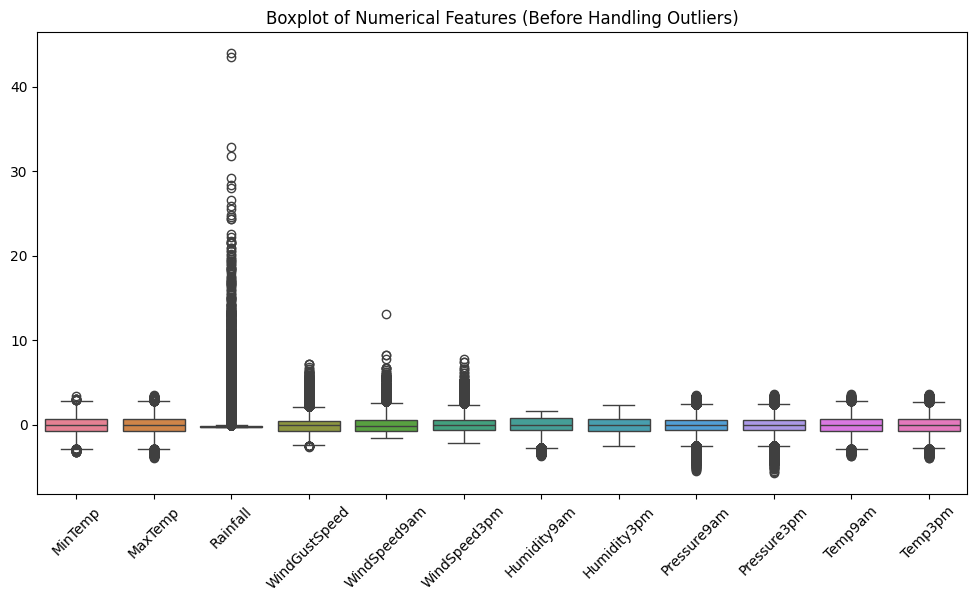

In [37]:
# Display box plot before handling outliers
plt.figure(figsize=(12, 6))
plt.title("Boxplot of Numerical Features (Before Handling Outliers)")
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.show()

**12.Handling outliers:**

In [38]:
for col in numerical_cols:
    # Calculate the IQR for the current column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and handle outliers by clipping values
    df[col] = np.clip(df[col], lower_bound, upper_bound)

**13.After handling outliers:**

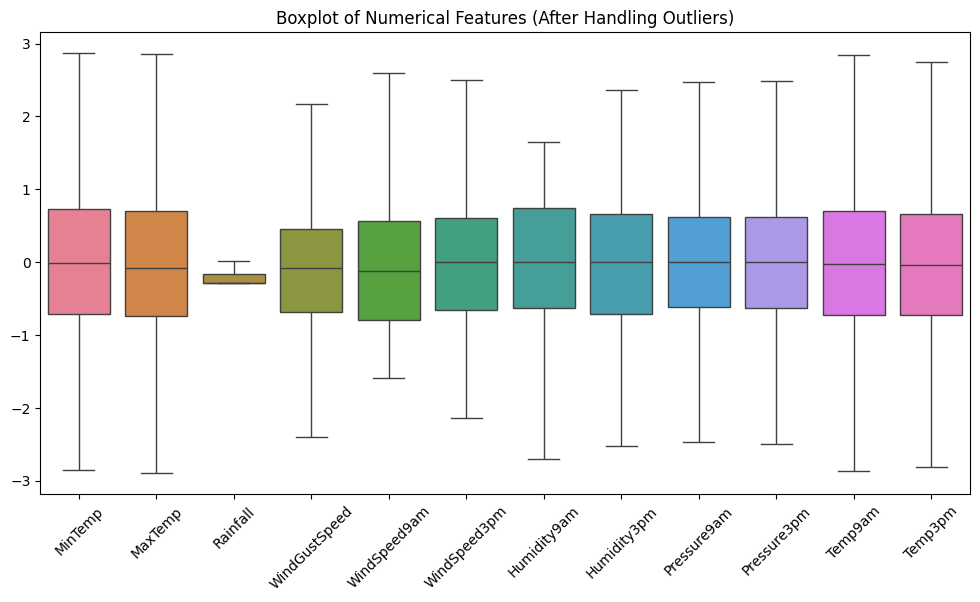

In [39]:
# Display box plot after handling outliers
plt.figure(figsize=(12, 6))
plt.title("Boxplot of Numerical Features (After Handling Outliers)")
sns.boxplot(data=df[numerical_cols ])
plt.xticks(rotation=45)
plt.show()

**13.Generating output files and splitting the processed dataset:**

In [40]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Save the preprocessed DataFrame to a CSV file
df.to_csv('weather_preprocessed.csv', index=False)

# Save the preprocessed training and testing sets to CSV files
train_df.to_csv('weather_train.csv', index=False)
test_df.to_csv('weather_test.csv', index=False)

# **LINEAR CLASSIFICATION:**

**1.Import preprocessed dataset:**

In [41]:
dataset = pd.read_csv('weather_preprocessed.csv')
X = dataset.drop(columns = ['RainTomorrow'])
y = dataset['RainTomorrow']

**2.Split the dataset:**

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**3.Fitting the logistic regression:**

In [43]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Initialize logistic regression model with appropriate solver and max_iter
logistic_model = LogisticRegression(solver='liblinear', max_iter=1000)

# Fit logistic regression model using scaled training data
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

**4.Naive Bayes classifier:**

In [44]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

**5.Summarizing the performance with confusion matrix:**

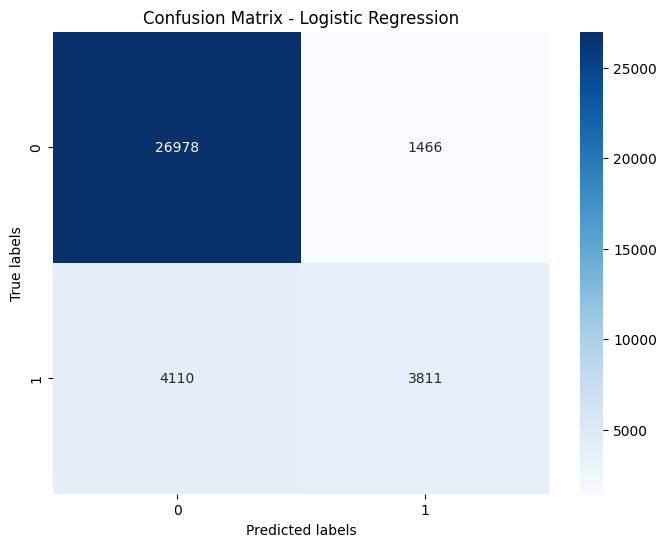

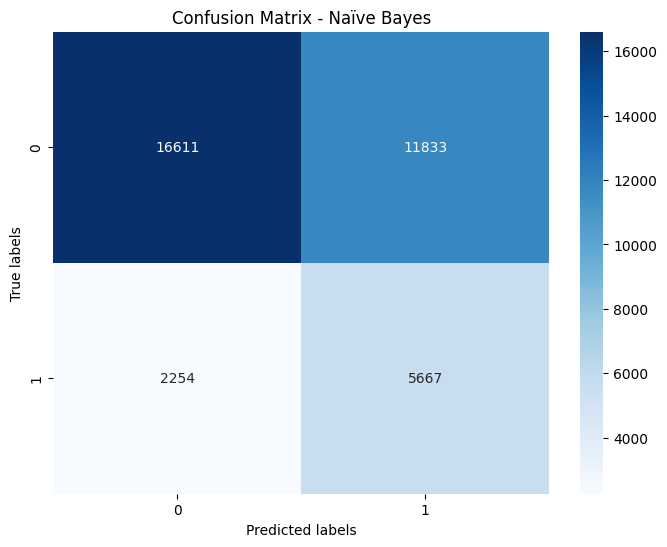

In [45]:
from sklearn.metrics import confusion_matrix


# Predictions
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_nb = naive_bayes_model.predict(X_test)

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.show()

plot_confusion_matrix(y_test, y_pred_logistic, title="Confusion Matrix - Logistic Regression")
plot_confusion_matrix(y_test, y_pred_nb, title="Confusion Matrix - Naïve Bayes")

**6.Display the Classification error, Precision, Recall , F1 score and  Specificity scores for the model:**

In [46]:
# Function to calculate and display classification metrics
def display_classification_metrics(y_true, y_pred):
    # Classification report
    report = classification_report(y_true, y_pred)
    print("Classification Report:")
    print(report)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # True Positives, False Positives, True Negatives, False Negatives
    TP = cm[1, 1]
    FP = cm[0, 1]
    TN = cm[0, 0]
    FN = cm[1, 0]

    # Classification error
    classification_error = (FP + FN) / float(TP + TN + FP + FN)

    # Precision
    precision = TP / float(TP + FP)

    # Recall
    recall = TP / float(TP + FN)

    # F1 Score
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Specificity
    specificity = TN / float(TN + FP)

    # Display metrics
    print("\nClassification Error: {:.4f}".format(classification_error))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1 Score: {:.4f}".format(f1_score))
    print("Specificity: {:.4f}".format(specificity))

# Calculate and display metrics for logistic regression model
print("\nMetrics for Logistic Regression Model:")
display_classification_metrics(y_test, y_pred_logistic)

# Calculate and display metrics for naive Bayes classifier
print("\nMetrics for Naive Bayes Classifier:")
display_classification_metrics(y_test, y_pred_nb)



Metrics for Logistic Regression Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     28444
           1       0.72      0.48      0.58      7921

    accuracy                           0.85     36365
   macro avg       0.79      0.71      0.74     36365
weighted avg       0.84      0.85      0.83     36365


Classification Error: 0.1533
Precision: 0.7222
Recall: 0.4811
F1 Score: 0.5775
Specificity: 0.9485

Metrics for Naive Bayes Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.58      0.70     28444
           1       0.32      0.72      0.45      7921

    accuracy                           0.61     36365
   macro avg       0.60      0.65      0.57     36365
weighted avg       0.76      0.61      0.65     36365


Classification Error: 0.3874
Precision: 0.3238
Recall: 0.7154
F1 Score: 0.4459
Specificity: 0.5840


**7.Adjust the classification threshold levels/decision boundary to improve the performance of the classifier**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


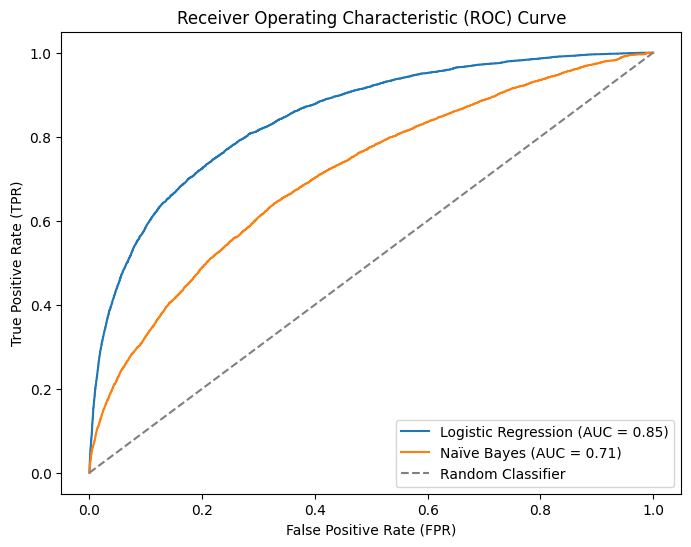

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities for positive class
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_prob_nb = naive_bayes_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score for Logistic Regression
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_prob_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)

# Calculate ROC curve and AUC score for Naïve Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naïve Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


**8.Perform k-fold cross validation and check whether the cross-validation results in performance improvement or not**

In [48]:
# Define k-fold cross-validation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation for logistic regression model
logistic_cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=k_fold, scoring='accuracy')

# Perform k-fold cross-validation for naive Bayes classifier
naive_bayes_cv_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=k_fold, scoring='accuracy')

# Calculate mean accuracy scores for both models
mean_accuracy_logistic = logistic_cv_scores.mean()
mean_accuracy_naive_bayes = naive_bayes_cv_scores.mean()

print("Mean Accuracy (Logistic Regression): {:.4f}".format(mean_accuracy_logistic))
print("Mean Accuracy (Naive Bayes): {:.4f}".format(mean_accuracy_naive_bayes))

# Check if there is an improvement in performance
if mean_accuracy_logistic > mean_accuracy_naive_bayes:
    print("Logistic Regression performs better with k-fold cross-validation.")
elif mean_accuracy_naive_bayes > mean_accuracy_logistic:
    print("Naive Bayes Classifier performs better with k-fold cross-validation.")
else:
    print("Both models perform equally well with k-fold cross-validation.")


Mean Accuracy (Logistic Regression): 0.8450
Mean Accuracy (Naive Bayes): 0.6079
Logistic Regression performs better with k-fold cross-validation.


**9.To check whether the model is overfitting or underfitting?**

In [49]:
# Perform k-fold cross-validation for Logistic Regression
logistic_cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5)

# Perform k-fold cross-validation for Naïve Bayes
naive_bayes_cv_scores = cross_val_score(naive_bayes_model, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores for Logistic Regression:", logistic_cv_scores)
print("Mean Cross-Validation Score for Logistic Regression:", logistic_cv_scores.mean())
print("\nCross-Validation Scores for Naïve Bayes Classifier:", naive_bayes_cv_scores)
print("Mean Cross-Validation Score for Naïve Bayes Classifier:", naive_bayes_cv_scores.mean())


Cross-Validation Scores for Logistic Regression: [0.84508914 0.84431001 0.84797653 0.84408085 0.84366836]
Mean Cross-Validation Score for Logistic Regression: 0.845024978229983

Cross-Validation Scores for Naïve Bayes Classifier: [0.60846052 0.60786471 0.61748934 0.60832302 0.60094413]
Mean Cross-Validation Score for Naïve Bayes Classifier: 0.6086163435537835


**10.Optimize the hyperparameters using scikit-learn’s GridSearchCV function**

In [50]:
# Define the model
logistic_model = LogisticRegression(max_iter=1000)
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

# Perform grid search with cross-validation to tune hyperparameters
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_C = best_params['C']

# Create a new logistic regression model with the best hyperparameters
tuned_logistic_model = LogisticRegression(C=best_C)

# Fit the tuned model on the training data
tuned_logistic_model.fit(X_train_scaled, y_train)

# Evaluate the tuned model on the training and validation/test data
train_accuracy = tuned_logistic_model.score(X_train_scaled, y_train)
test_accuracy = tuned_logistic_model.score(X_test_scaled, y_test)
print("Best Hyperparameters:", best_params)
print("Training Accuracy:", train_accuracy)
print("Validation/Test Accuracy:", test_accuracy)

Best Hyperparameters: {'C': 0.1, 'solver': 'liblinear'}
Training Accuracy: 0.8456207892204043
Validation/Test Accuracy: 0.8465832531280078
